In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
# Step 1: Load the Dataset

california = fetch_california_housing()
df=pd.DataFrame(california.data, columns=california.feature_names)
df['Price']=california.target
print("Dataset (firts 5 rows:)\n", df.head())

Dataset (firts 5 rows:)
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object

In [5]:

x=df[['MedInc']]
y=df[['HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Price',]]


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [7]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [3.17341406e+01 3.80045740e+00 1.16073490e+00 1.41690047e+03
 2.57640073e+00 3.59765632e+01 4.44597292e-01]
Coefficients: [[-0.80547632]
 [ 0.42125255]
 [-0.01650456]
 [ 2.46151499]
 [ 0.13413899]
 [-0.08591472]
 [ 0.41933849]]


In [9]:
y_pred = model.predict(x_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
 
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 177268.92600035225
R-squared: 0.07620604952512335
Root Mean Squared Error: 421.03316496489


In [11]:
residuals=y_test-y_pred
residuals

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Price
20046,-5.379974,-0.316467,-0.110703,-29.038768,1.075522,0.227877,-0.672589
3024,0.304762,0.172610,0.074536,141.868698,-0.236152,-0.619087,-1.048069
15663,23.068998,-1.289304,0.082580,-115.466787,-1.682886,2.122429,3.096073
20484,-10.112640,-0.053800,-0.045836,273.976342,0.098408,-1.203619,-0.664594
9814,5.266259,0.123368,-0.071218,-363.069612,-0.592424,0.963469,0.773367
...,...,...,...,...,...,...,...
15362,-12.024922,1.261887,-0.018360,-77.235746,-0.205173,-2.220926,0.257349
16623,-1.537929,1.182870,0.141004,226.387964,-0.601719,-0.382308,1.080034
18086,0.700245,-0.450858,-0.061218,145.380240,-1.023984,2.126413,0.685002
2144,6.509111,0.315384,-0.131647,-196.755788,-0.361370,1.032709,-0.889455


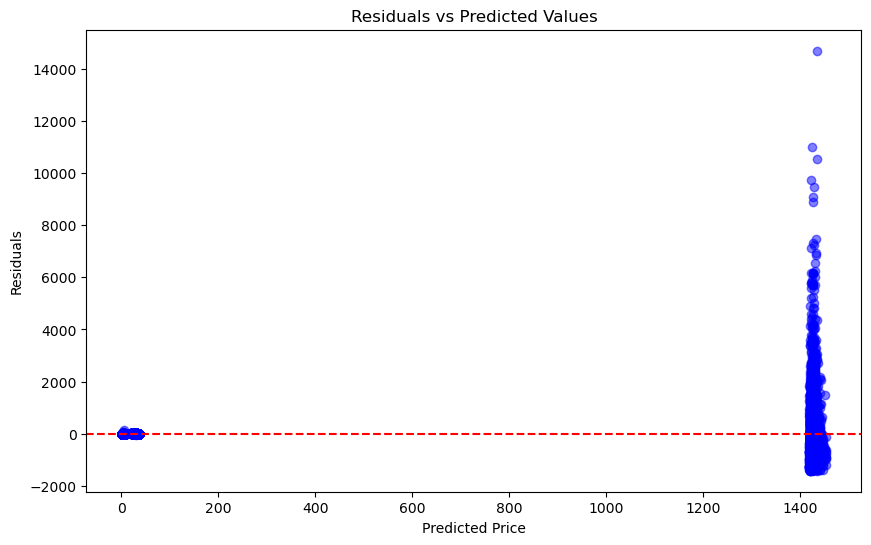

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()


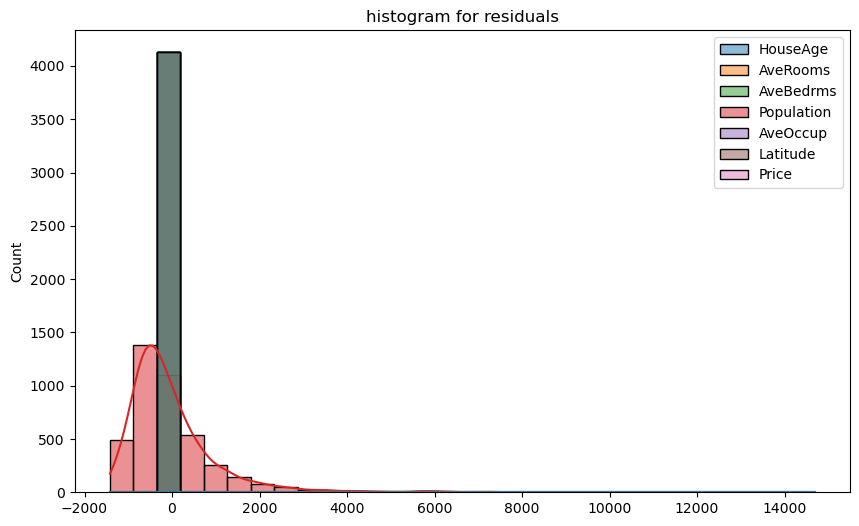

In [18]:
#bell shaped-normal
#skewed or peaked curve-bad
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title("histogram for residuals")
plt.show()

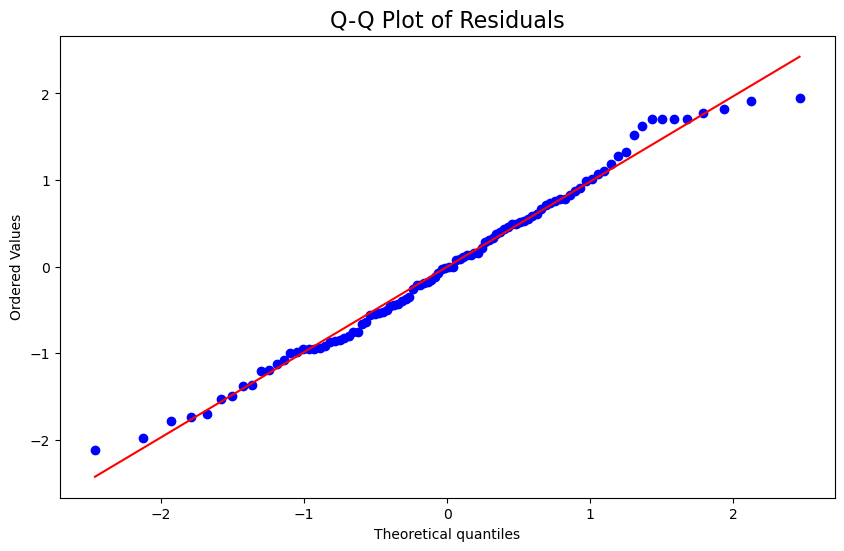

In [28]:
#Q-Q Plot -normality check
#good= points follow red line
#bad-deviations at ends(especially)
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals", fontsize=16)
plt.show()


**interpret residual analysis**
linearity:scatter plot shows no strong curve-assumption holds decently
constant variance: slight fannig at higher price -mild heteroscedasticity(variance grows)
normality:histogram and Q-Q show approx 

**KFold technique**

In [44]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import numpy as np

data = fetch_california_housing()
x, y = data.data[:100, :2], data.target[:100]
x += np.random.normal(scale=20, size=x.shape)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, x, y, cv=kf, scoring='r2')
print("cross-validation scores:", scores)
print("Average score:", scores.mean())


cross-validation scores: [-0.03019527 -0.00224779 -0.36284473 -0.33794969  0.01160793]
Average score: -0.144325909575872
